In [2]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
mdata = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
mdata.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
mdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
nmdata = mdata
nmdata.shape

(7043, 21)

In [9]:
# Changing Columns to numeric
nmdata.TotalCharges = pd.to_numeric(mdata.TotalCharges, errors = 'coerce')
nmdata.MonthlyCharges = pd.to_numeric(mdata.MonthlyCharges, errors = 'coerce')
nmdata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
## Dropping missing values
nmdata.dropna(how = 'any', inplace = True)

In [11]:
print(nmdata["tenure"].max())

72


In [12]:
# creating tenure bins
labels =   ["{0} - {1}".format(i,i+11) for i in range(1,72,12) ]
nmdata['tenure-grp'] = pd.cut(nmdata.tenure,range(1,80,12), right=False, labels=labels)

In [13]:
nmdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure-grp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [14]:
#  drop unneccessary colunms like customer id and tenure(tenure as we now have a tenure group)
nmdata.drop(columns = ['customerID','tenure'], axis=1,inplace= True)

In [15]:
nmdata.shape

(7032, 20)

In [16]:
nmdata.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure-grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration 

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Univariate Analysis

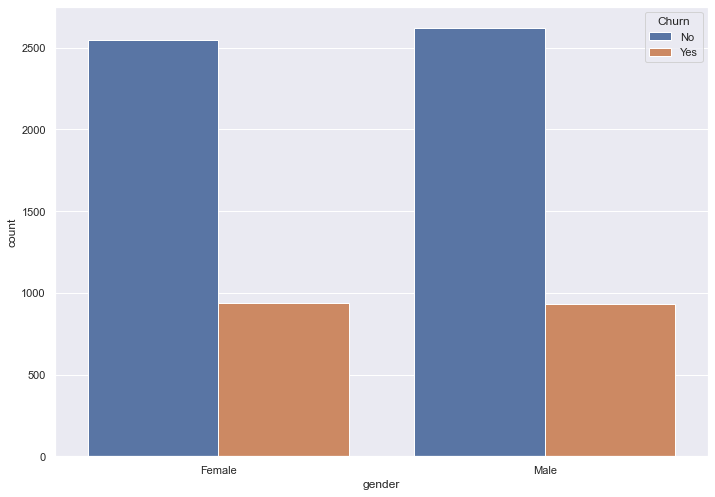

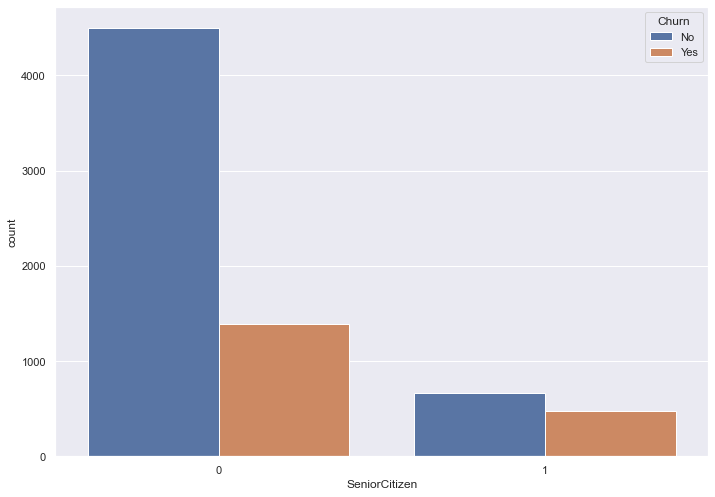

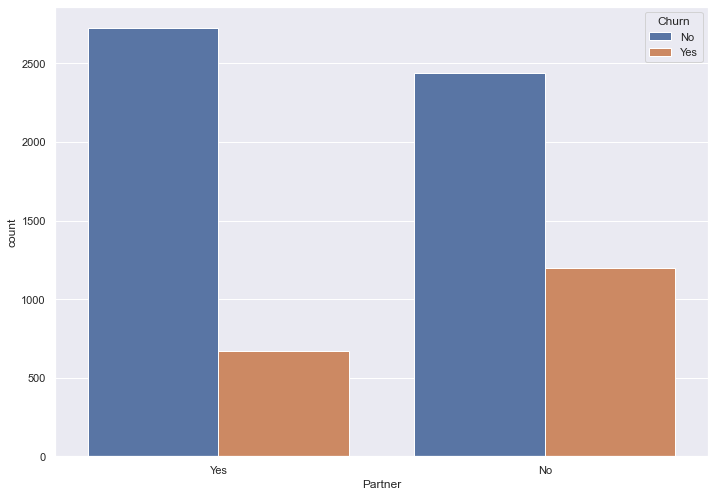

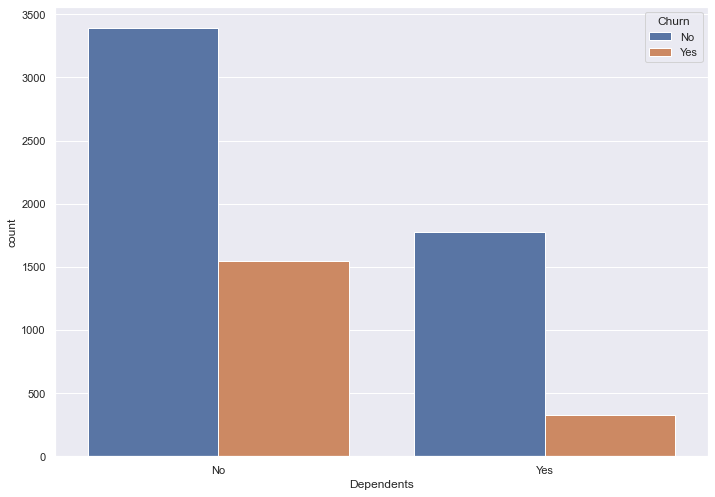

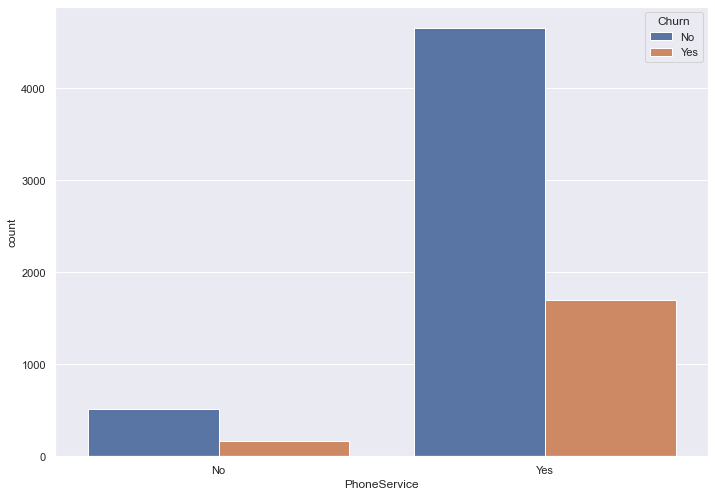

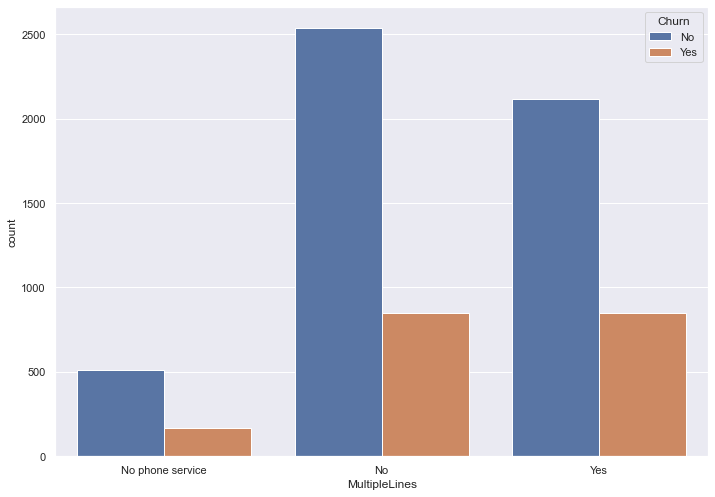

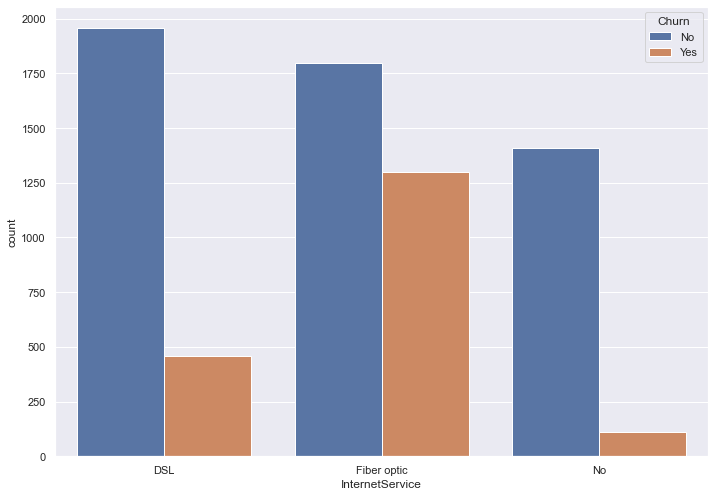

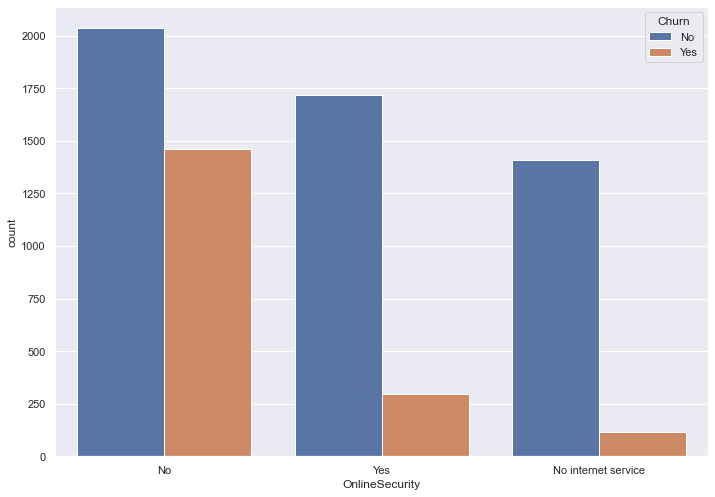

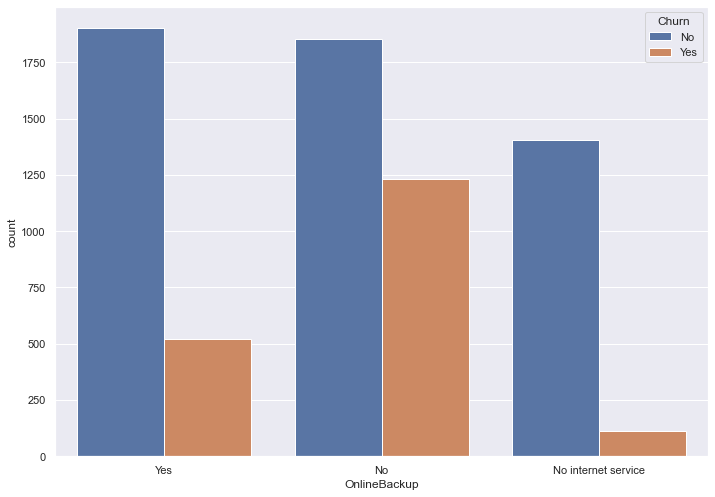

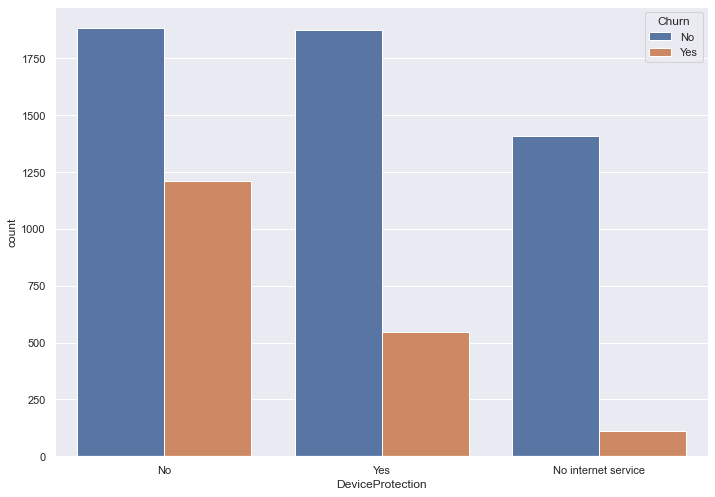

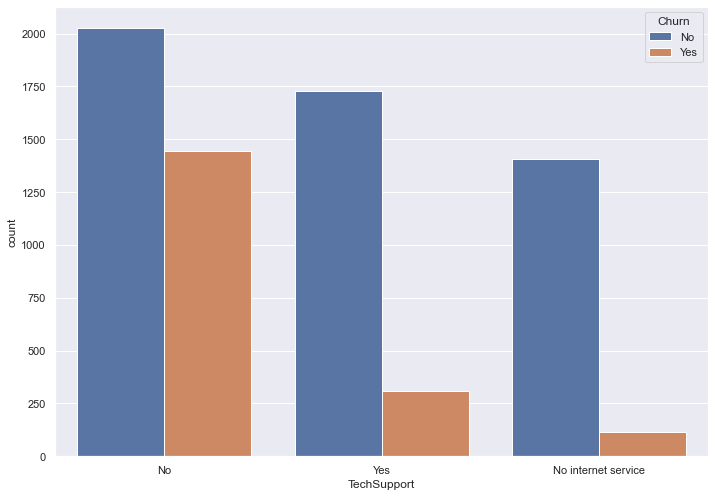

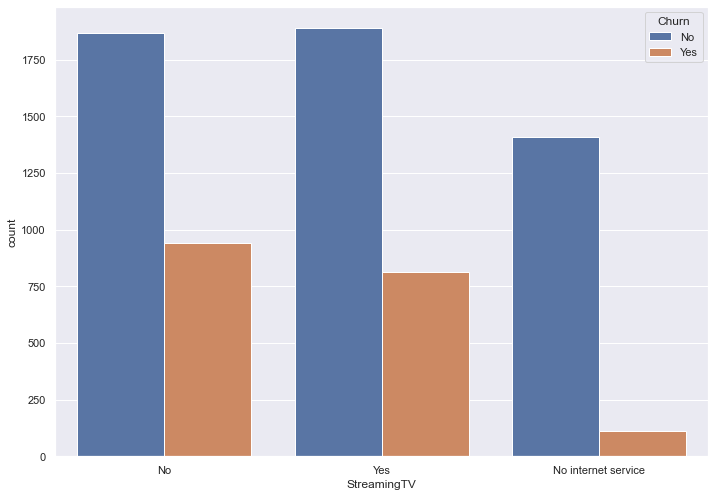

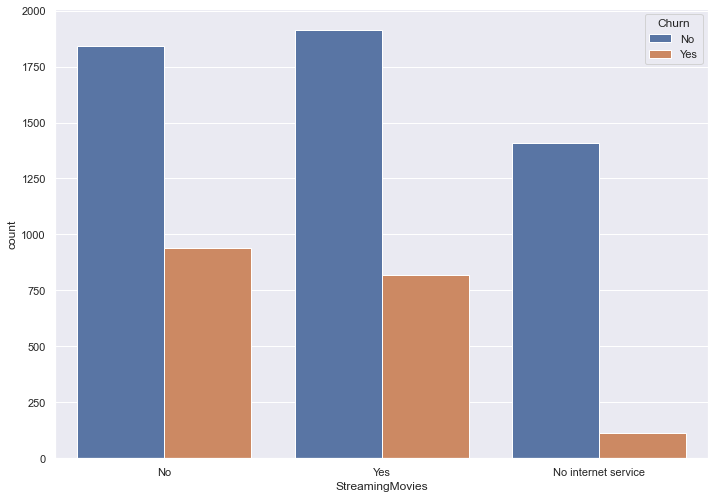

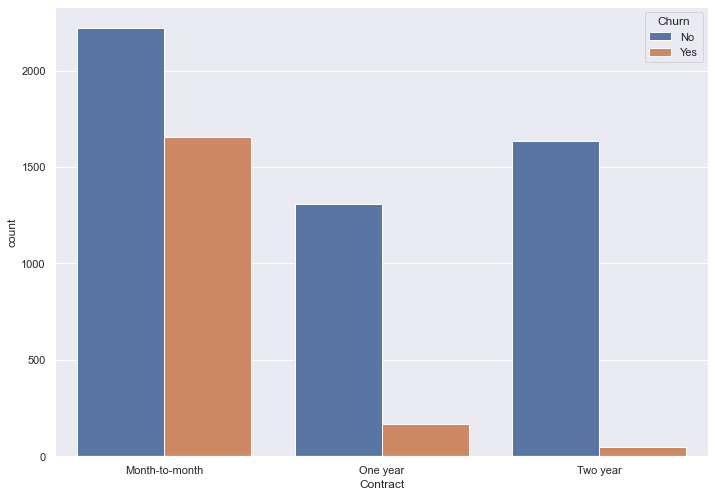

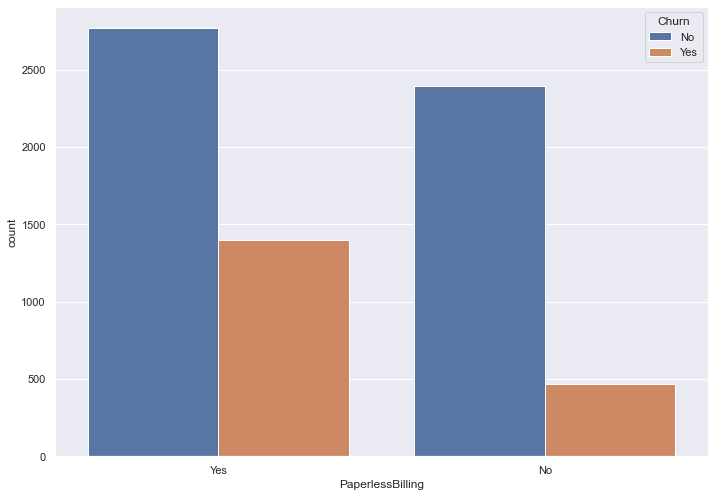

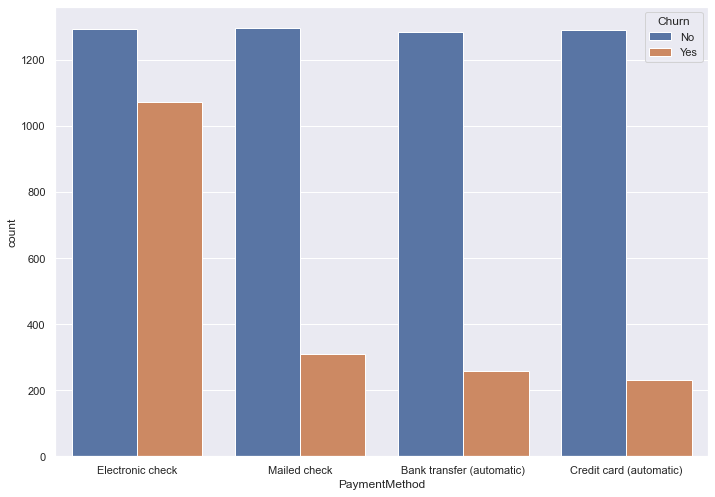

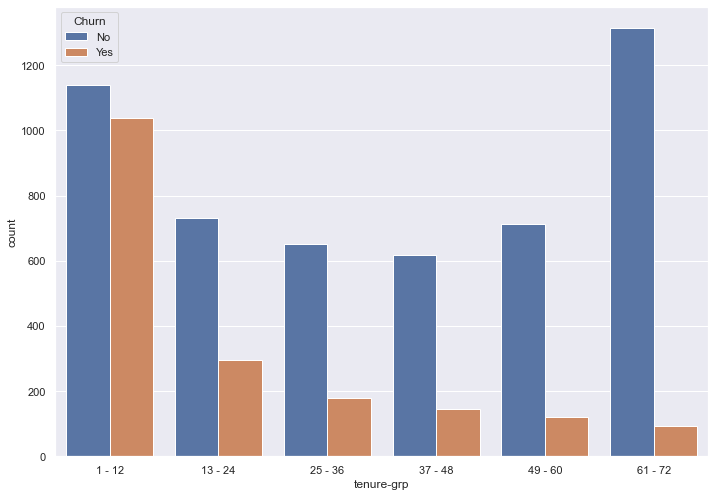

In [18]:
for i,predictor in enumerate(nmdata.drop(columns=['Churn','MonthlyCharges','TotalCharges'])):
    plt.figure(i)
    sns.countplot(data = nmdata,x=predictor, hue = 'Churn')

### Converting categorical data to numeric with One hot encoding

In [19]:
nmdata_dummies = pd.get_dummies(nmdata,columns=['gender','Partner','Dependents','SeniorCitizen','PaymentMethod'])
nmdata_dummies.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,...,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,SeniorCitizen_0,SeniorCitizen_1,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,...,0,1,1,0,1,0,0,0,1,0
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,...,1,0,1,0,1,0,0,0,0,1
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,...,1,0,1,0,1,0,0,0,0,1
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,...,1,0,1,0,1,0,1,0,0,0
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,...,1,0,1,0,1,0,0,0,1,0


In [20]:
nmdata_dummies.Churn.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)

In [21]:
nmdata_dummies.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,...,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,SeniorCitizen_0,SeniorCitizen_1,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,...,0,1,1,0,1,0,0,0,1,0
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,...,1,0,1,0,1,0,0,0,0,1
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,...,1,0,1,0,1,0,0,0,0,1
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,...,1,0,1,0,1,0,1,0,0,0
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,...,1,0,1,0,1,0,0,0,1,0


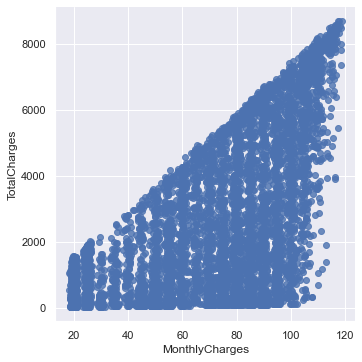

In [22]:
sns.lmplot(data = nmdata_dummies,x='MonthlyCharges', y = 'TotalCharges', fit_reg = False)

Text(0.5, 1.0, 'Mothly Charges by Churn')

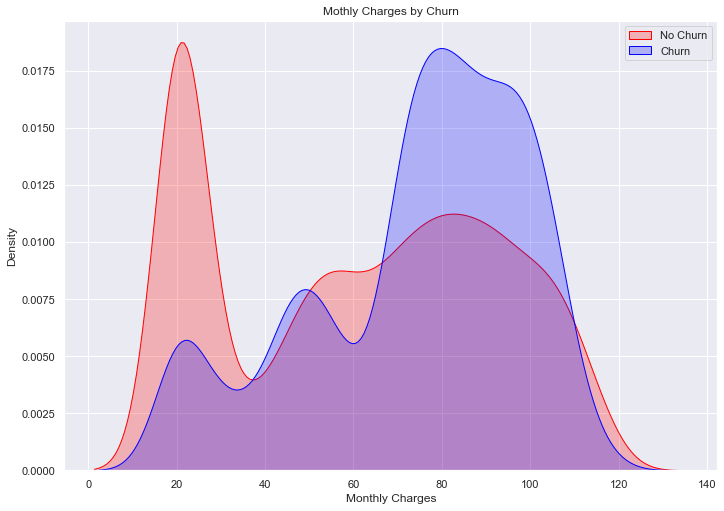

In [23]:
#  Churn by monthly Charges and total charges 
Mth = sns.kdeplot(nmdata_dummies.MonthlyCharges[(nmdata_dummies.Churn == 0)], color = 'Red', shade = True)
Mth = sns.kdeplot(nmdata_dummies.MonthlyCharges[(nmdata_dummies.Churn == 1)], ax=Mth , color = 'Blue', shade =True ) 
Mth.legend(['No Churn', 'Churn'], loc='upper right')
Mth.set_xlabel('Monthly Charges')
Mth.set_ylabel('Density')
Mth.set_title('Mothly Charges by Churn')

In [27]:
nmdata_dummies.to_csv('telecom_clean.csv')

<AxesSubplot:>

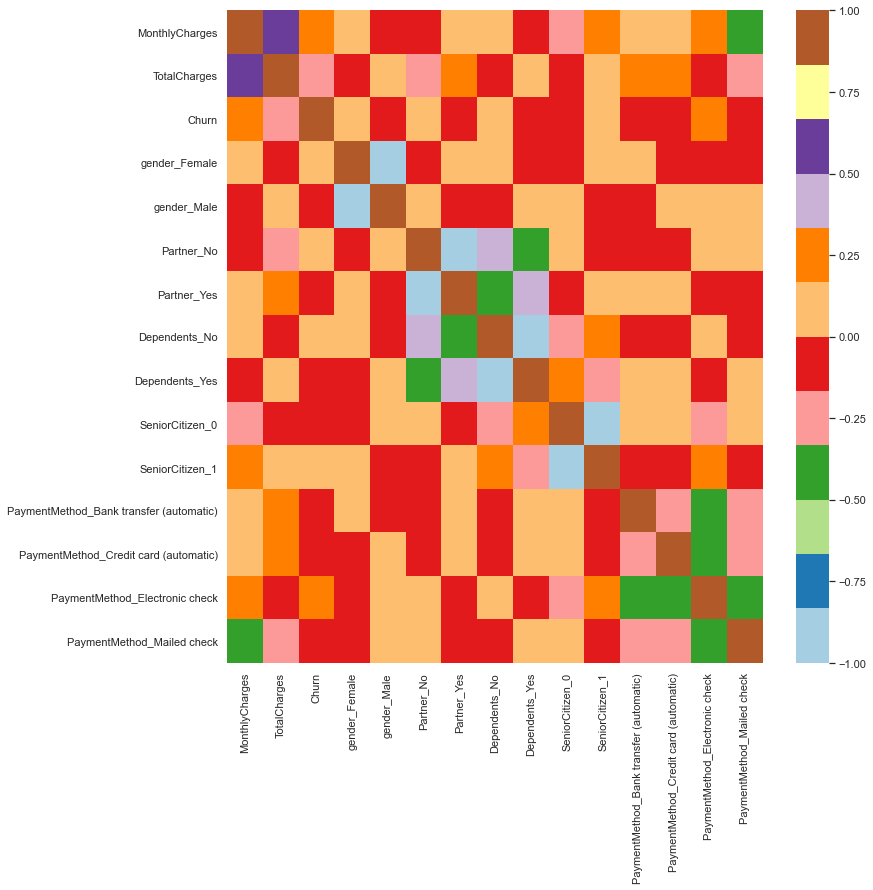

In [25]:
plt.figure(figsize = (12,12))
sns.heatmap(nmdata_dummies.corr(),cmap="Paired")

# Model Building

In [26]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [28]:
data_tel = pd.read_csv('telecom_clean.csv')

In [29]:
data_tel.shape

(7032, 28)

In [31]:
data_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               7032 non-null   int64  
 1   PhoneService                             7032 non-null   object 
 2   MultipleLines                            7032 non-null   object 
 3   InternetService                          7032 non-null   object 
 4   OnlineSecurity                           7032 non-null   object 
 5   OnlineBackup                             7032 non-null   object 
 6   DeviceProtection                         7032 non-null   object 
 7   TechSupport                              7032 non-null   object 
 8   StreamingTV                              7032 non-null   object 
 9   StreamingMovies                          7032 non-null   object 
 10  Contract                                 7032 no

In [35]:
data_tels = pd.get_dummies(data_tel,columns=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','tenure-grp'])

In [36]:
data_tels.shape

(7032, 53)

In [37]:
data_tels.head()

,Unnamed: 0,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,tenure-grp_1 - 12,tenure-grp_13 - 24,tenure-grp_25 - 36,tenure-grp_37 - 48,tenure-grp_49 - 60,tenure-grp_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
1,1,56.95,1889.50,0,0,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
4,4,70.70,151.65,1,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0


In [40]:
data_tels = data_tels.drop(columns='Unnamed: 0',axis=1)

In [41]:
data_tels.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,SeniorCitizen_0,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,tenure-grp_1 - 12,tenure-grp_13 - 24,tenure-grp_25 - 36,tenure-grp_37 - 48,tenure-grp_49 - 60,tenure-grp_61 - 72
0,29.85,29.85,0,1,0,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,1,0,1,0,0,0,1,0,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0


In [42]:
# input data
x = data_tels.drop(columns='Churn',axis=1)
x

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,SeniorCitizen_0,SeniorCitizen_1,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,tenure-grp_1 - 12,tenure-grp_13 - 24,tenure-grp_25 - 36,tenure-grp_37 - 48,tenure-grp_49 - 60,tenure-grp_61 - 72
0,29.85,29.85,1,0,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,56.95,1889.50,0,1,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
2,53.85,108.15,0,1,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,1,1,0,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
4,70.70,151.65,1,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,84.80,1990.50,0,1,0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,0
7028,103.20,7362.90,1,0,0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
7029,29.60,346.45,1,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
7030,74.40,306.60,0,1,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0


In [43]:
# labels
y = data_tels['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

## Train and Test Split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((5625, 51), (1407, 51), (5625,), (1407,))

## Decision Tree Classifier

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [45]:
depth = [1,5,10,20,50,100]
split = [5,10,50,100]

In [60]:
# define function to train the model across various splits and depths
def train_model(x_train,y_train,depth,split):
    tuned_parameters = dict(max_depth = depth,min_samples_split = split) # parameters for grid search Cv
    model = DecisionTreeClassifier(class_weight='balanced')

    #grid serach CV
    clf = GridSearchCV(model,tuned_parameters,scoring='f1',cv=2,n_jobs=1)
    clf.fit(x_train,y_train)

    #best hyperParameters
    best_depth,best_split = clf.best_params_.get('max_depth'),clf.best_params_.get('min_samples_split')

    Train_AUC = clf.cv_results_.get('mean_train_score')
    cv_AUC = clf.cv_results_.get('mean_test_score') 

    print(clf.best_params_)
    print(clf.best_score_)
    print(clf.best_estimator_)
    #print(clf.grid_scores)


    return Train_AUC,cv_AUC, best_depth,best_split


In [61]:
## Call function to train the model
Train_AUC,cv_AUC, best_depth,best_split = train_model(x_train,y_train,depth,split)

{'max_depth': 5, 'min_samples_split': 50}
0.6143842490957243
DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=50)


In [69]:
## Train the model with best hyper parameter
model = DecisionTreeClassifier(class_weight='balanced',max_depth=best_depth,min_samples_split=best_split)
model.fit(x_train,y_train)
# Labelprediction on test data
pred_label = model.predict(x_test)
# Probability Predictions on train data
train_pred = model.predict_proba(x_train)[:,1]
# Probability Predictions on test data
test_pred = model.predict_proba(x_test)[:,1]


# ROC_AUC_SCORE
test_score = roc_auc_score(y_test,test_pred)
print('\nTest AUC score = ' +str(test_score))




Test AUC score = 0.8206122448979593


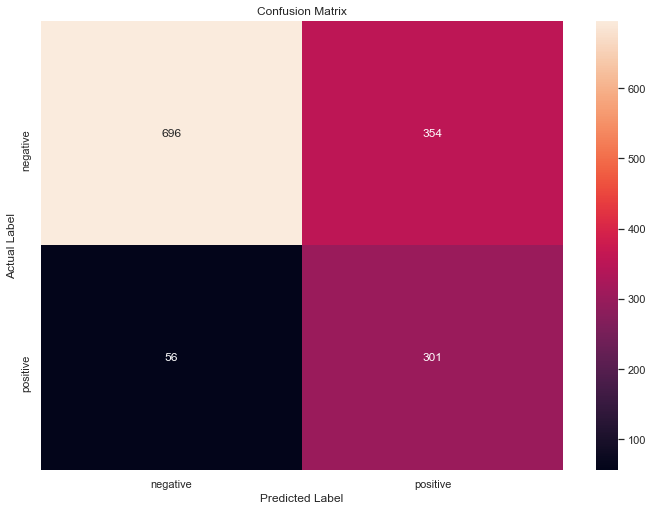

In [70]:
# Confusion Matrix to Identify, if the model is baised towards positive points or not.
cm = confusion_matrix(y_test, pred_label)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [75]:
print(classification_report(y_test,pred_label,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1050
           1       0.46      0.84      0.59       357

    accuracy                           0.71      1407
   macro avg       0.69      0.75      0.68      1407
weighted avg       0.81      0.71      0.73      1407



Since the dataset in hand is highly imbalanced, hence cannot be trusted. To deal wih this, we have to either UPSAMPLING of data or DOWNSAMPLING of data. Mostly Upsampling is preffered as we donot want to loose ay data by downsampling. SMOTEENN will help in sampling the data

In [76]:
sm = SMOTEENN()
x_sampled,y_sampled =sm.fit_resample(x,y) 

x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=40)

Train_AUC,cv_AUC, best_depth,best_split = train_model(x_train,y_train,depth,split)


{'max_depth': 20, 'min_samples_split': 50}
0.932087559163632
DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=50)


In [77]:
## Train the model with best hyper parameter
model = DecisionTreeClassifier(class_weight='balanced',max_depth=best_depth,min_samples_split=best_split)
model.fit(x_train,y_train)
# Labelprediction on test data
pred_label = model.predict(x_test)
# Probability Predictions on train data
train_pred = model.predict_proba(x_train)[:,1]
# Probability Predictions on test data
test_pred = model.predict_proba(x_test)[:,1]


# ROC_AUC_SCORE
test_score = roc_auc_score(y_test,test_pred)
print('\nTest AUC score = ' +str(test_score))


Test AUC score = 0.975010912917905


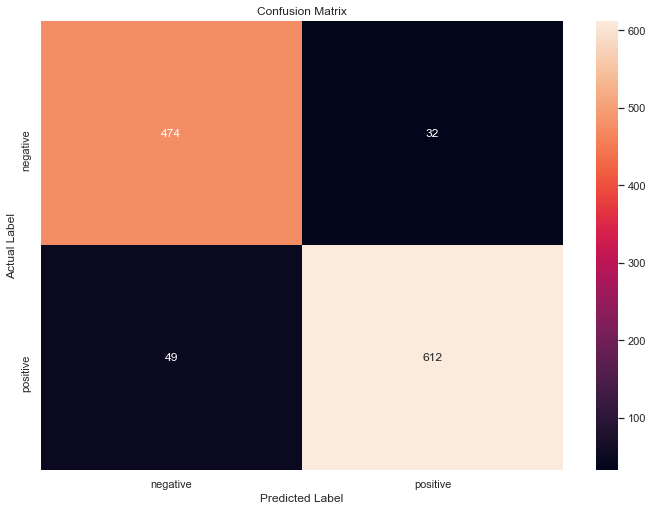

In [78]:
# Confusion Matrix to Identify, if the model is baised towards positive points or not.
cm = confusion_matrix(y_test, pred_label)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [79]:
print(classification_report(y_test,pred_label,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       506
           1       0.95      0.93      0.94       661

    accuracy                           0.93      1167
   macro avg       0.93      0.93      0.93      1167
weighted avg       0.93      0.93      0.93      1167



## Save model for productionization

In [80]:
import pickle

In [81]:
filename = 'churn_model.sav'

In [82]:
pickle.dump(model,open(filename,'wb'))

# Productionization of the model

In [84]:
load_model = pickle.load(open(filename,'rb'))

In [85]:
load_model.score(x_test,y_test)

0.9305912596401028

93% accuracy, we can also pass a solo record and use load_model.predict() to predict if the customer will churm or not.

# Deployment of the model

Flask API will be used to access our model.. please refer churn_prod.py for reference